Найдите любую базу, подходящую для регрессии:

1. Сделайте парсинг и обработку данных.
2. Разделите данные на обучающую и проверочную выборки
3. Напишите сеть для регрессии
4. Сделайте визуализацию результата
5. Напишите ваши результаты и выводы

# Импорт библиотек

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.datasets import boston_housing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
import pandas as pd
import random
import math
from google.colab import drive
import time

import re
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output

In [ ]:
np.random.seed(42)

# Подключение к Гугл диску

# Подготовка данных

Набор данных boston_housing:
Набор содержит 13 различных свойств:

Уровень преступности на душу населения.

Доля жилой земли, выделенной для участков более 25 000 квадратных футов.

Доля не торговых бизнес акров на город.

Переменная реки Чарлз (равна 1 если рядом река, 0 если нет).

Концентрация оксидов азота (частей на 10 миллионов)

Среднее количество комнат на жилье.

Пропорция домов частных владельцев, построенных до 1940 года.

Взвешенные расстояния до пяти рабочих центров Бостона.

Индекс доступности близлежащих автомагистралей.

Полная стоимость налога на имущество на 10 000 долларов США.

Среднее количество учителей для детей на город.

1000 * (Bk - 0.63) ** 2, где Bk - это пропорция афроамериканцев на город.

Процент населения с низким социальным статусом.


In [ ]:
(xTrain, yTrain), (xTest, yTest) = boston_housing.load_data()
print(xTrain.shape)
print(yTrain.shape)

(404, 13)
(404,)


In [ ]:
print(yTrain.shape)

(404,)


Для обучения модели возьмем 1, 4 и 6 параметры

In [ ]:
xStandardOne = StandardScaler()
xStandardTwo = StandardScaler()
xStandardThree = StandardScaler()

xStandardOne.fit(xTrain[:,0].reshape(-1,1))
xStandardTwo.fit(xTrain[:,3].reshape(-1,1))
xStandardThree.fit(xTrain[:,5].reshape(-1,1))

xTrainScaled = xTrain[:,:3].copy()
xTestScaled = xTest[:,:3].copy()

xTrainScaled[:,0] = xStandardOne.transform(xTrain[:,0].reshape(-1,1)).flatten()
xTrainScaled[:,1] = xStandardTwo.transform(xTrain[:,3].reshape(-1,1)).flatten()
xTrainScaled[:,2] = xStandardThree.transform(xTrain[:,5].reshape(-1,1)).flatten()
xTestScaled[:,0] = xStandardOne.transform(xTest[:,5].reshape(-1,1)).flatten()
xTestScaled[:,1] = xStandardTwo.transform(xTest[:,5].reshape(-1,1)).flatten()
xTestScaled[:,2] = xStandardThree.transform(xTest[:,5].reshape(-1,1)).flatten()

yScaler = StandardScaler()
yScaler.fit(yTrain.reshape(-1,1))
yTrainScaled = yScaler.transform(yTrain.reshape(-1,1))
# yTestScaled = yScaler.transform(yTest.reshape(-1,1))

In [ ]:
print(xTrainScaled.shape)
print(yTrainScaled.shape)

(404, 3)
(404, 1)


In [ ]:
def create_model():
  input = Input(shape=(xTrainScaled.shape[1]))

  x = Dense(256, activation="relu")(input)
  x = Dense(128, activation="relu")(x)
  x = Dense(1, activation="relu")(x)

  model = Model(input, x)

  model.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=['mae'])

  model.summary()
  
  return model



In [ ]:
def show(history):
  plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
  plt.plot(history.history['val_mae'], 
          label='Средняя абсолютная ошибка на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Средняя абсолютная ошибка')
  plt.legend()
  plt.show()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_47 (Dense)            (None, 256)               1024      
                                                                 
 dense_48 (Dense)            (None, 128)               32896     
                                                                 
 dense_49 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34,049
Trainable params: 34,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 18ms/step - loss: 0.6847 - mae: 0.6179 - val_loss: 0.4676 - val_mae: 0.5397
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.5431 - mae: 0.5624 - val_loss: 0.3832 - val_mae: 0.4894
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.5077 - mae: 0.5208 - val_loss: 0.3707 - val_mae: 0.4866
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 0.5031 - mae: 0.5202 - val_loss: 0.3867 - val_mae: 0.5054
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.5066 - mae: 0.5237 - val_loss: 0.3937 - val_mae: 0.5075
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 0.5025 - mae: 0.5198 - val_loss: 0.3790 - val_mae: 0.4975
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.5024 - mae: 0.5201 - val_loss: 0.3812 - val_mae: 0.4982
Epoch 8/10
12/12 [==============================] - 0s 4ms/step - loss: 0.4995 - mae: 0.5214 - val_l

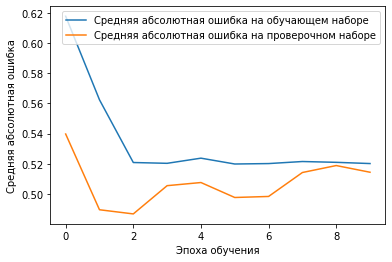

In [ ]:
epochs = 10

model = create_model()

history = model.fit(xTrainScaled,
                    yTrainScaled,
                    epochs=epochs,
                    validation_split=0.1,
                    verbose=1
                    )

show(history)

In [ ]:
yPredScaled = model.predict(xTestScaled[:10])
yPred = yScaler.inverse_transform(yPredScaled)

for ii in range(10):
  print(f"Должно быть: {yTest[ii]}\nМодель предсказала: {round(yPred[ii][0])}\n")

Должно быть: 7.2
Модель предсказала: 71

Должно быть: 18.8
Модель предсказала: 59

Должно быть: 19.0
Модель предсказала: 61

Должно быть: 27.0
Модель предсказала: 67

Должно быть: 22.2
Модель предсказала: 64

Должно быть: 24.5
Модель предсказала: 59

Должно быть: 31.2
Модель предсказала: 82

Должно быть: 22.9
Модель предсказала: 65

Должно быть: 20.5
Модель предсказала: 60

Должно быть: 23.2
Модель предсказала: 71



Вывод: чтобы улучшить качество модели можно увеличить количество параметров, а также сделать архитектуру сложнее